<a href="https://colab.research.google.com/github/anandaryan008/Assignment-1/blob/main/assignment1(aiml)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Water_pond_tanks_2021.csv to Water_pond_tanks_2021.csv


              precision    recall  f1-score   support

        LAKE       0.73      0.93      0.82        76
        POND       0.70      0.37      0.48        19
        TANK       0.73      0.42      0.54        26
     Wetland       1.00      0.67      0.80         3

    accuracy                           0.73       124
   macro avg       0.79      0.60      0.66       124
weighted avg       0.73      0.73      0.71       124

[[71  3  2  0]
 [10  7  2  0]
 [15  0 11  0]
 [ 1  0  0  2]]


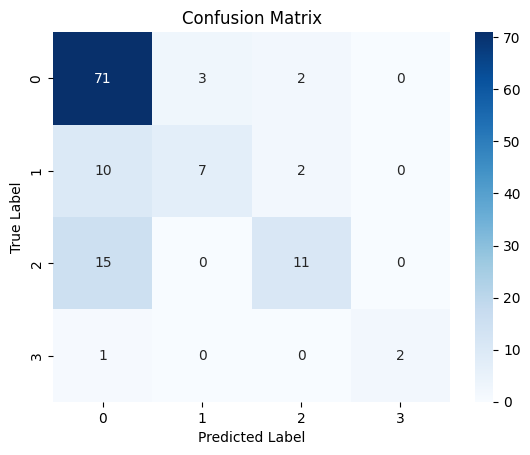

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and Clean Data
# Specify the encoding when reading the CSV file
# 'latin-1' or 'iso-8859-1' are common encodings that might work
data = pd.read_csv("Water_pond_tanks_2021.csv", encoding='latin-1')

# Convert columns to numeric where possible
numeric_columns = [
    'Temperature\n?C (Min)', 'Temperature\n?C (Max)', 'Dissolved Oxygen (mg/L) (Min)',
    'Dissolved Oxygen (mg/L) (Max)', 'pH (Min)', 'pH (Max)',
    'Conductivity (?mhos/cm) (Min)', 'Conductivity (?mhos/cm) (Max)',
    'BOD (mg/L) (Min)', 'BOD (mg/L) (Max)', 'Nitrate N + Nitrite N(mg/L) (Min)',
    'Nitrate N + Nitrite N(mg/L) (Max)', 'Fecal Coliform (MPN/100ml) (Min)',
    'Fecal Coliform (MPN/100ml) (Max)', 'Total Coliform (MPN/100ml) (Min)',
    'Total Coliform (MPN/100ml) (Max)'
]
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Apply fillna only to numeric columns
# This ensures that only numeric columns are filled with the median.
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Step 2: EDA (Optional)
# sns.pairplot(data[numeric_columns])
# plt.show()

# Step 3: Feature Selection
# Assume we're trying to classify based on a feature (e.g., "Type Water Body")
X = data[numeric_columns]  # Features
y = data['Type Water Body']  # Target (adjust as needed)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Model (Random Forest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve (for binary classification tasks)
if len(y.unique()) == 2:  # Only if binary classification
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend(loc="lower right")
    plt.show()

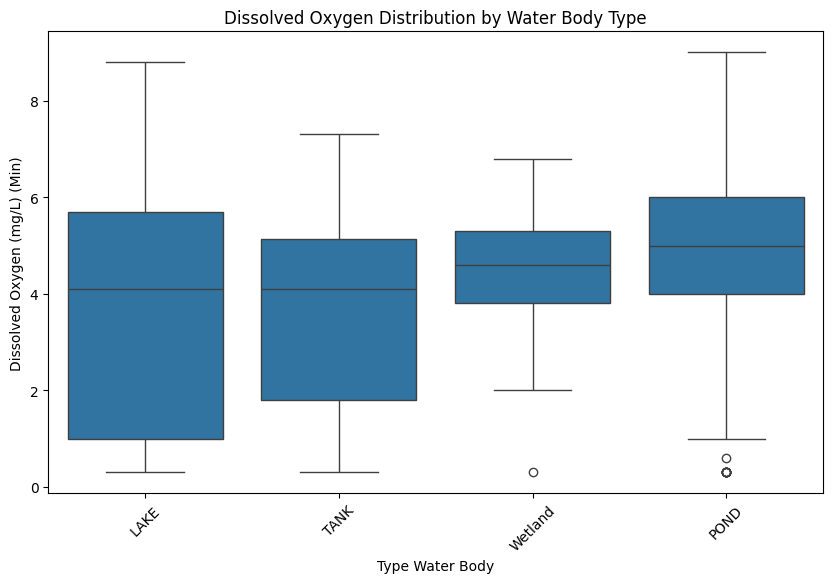

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type Water Body", y="Dissolved Oxygen (mg/L) (Min)", data=data)
plt.xticks(rotation=45)
plt.title("Dissolved Oxygen Distribution by Water Body Type")
plt.show()

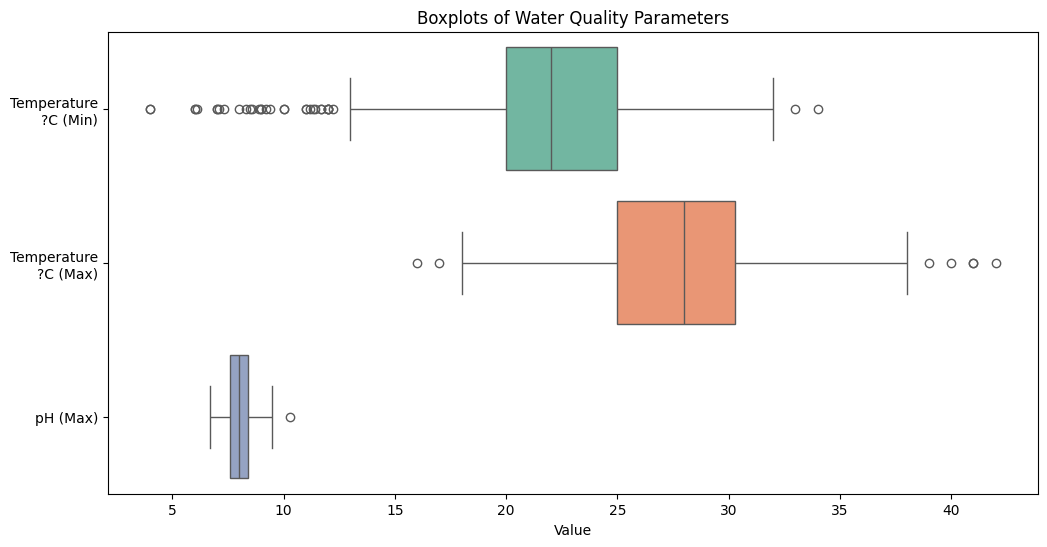

In [10]:
# Boxplots for each parameter to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_columns], orient="h", palette="Set2")
plt.title("Boxplots of Water Quality Parameters")
plt.xlabel("Value")
plt.show()


<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


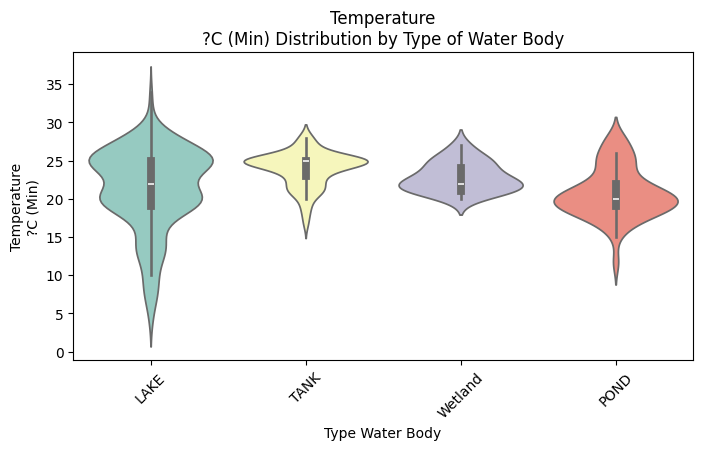

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


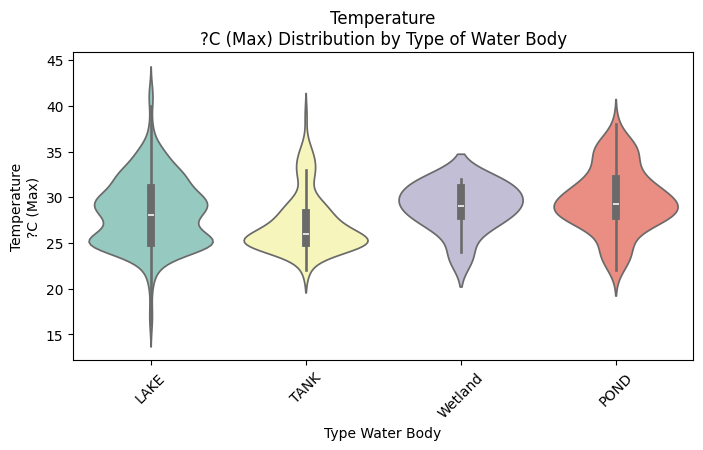

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


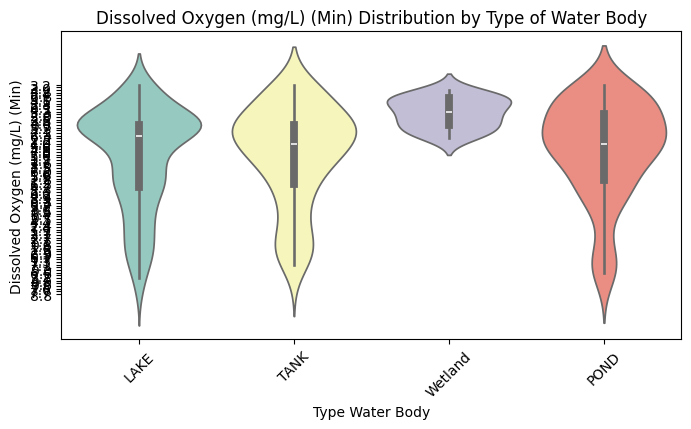

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


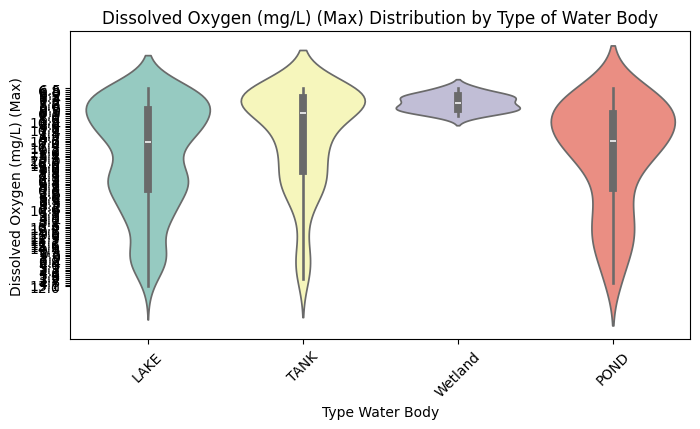

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


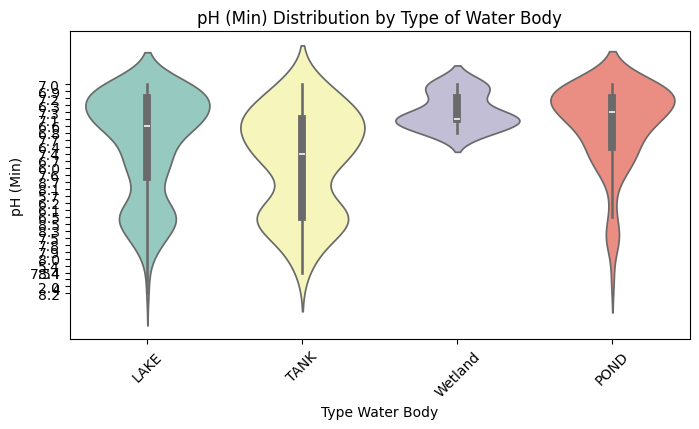

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


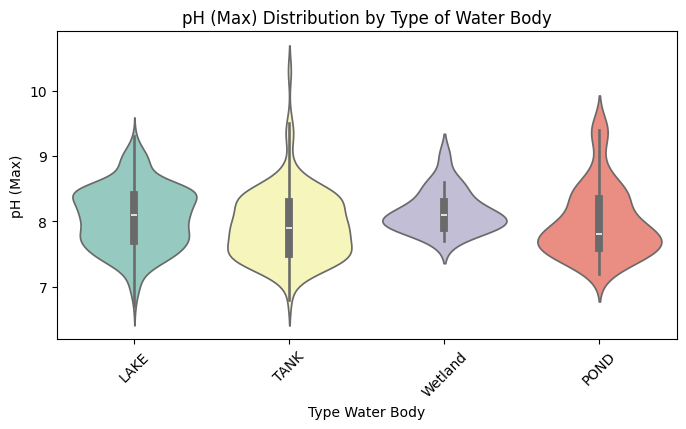

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


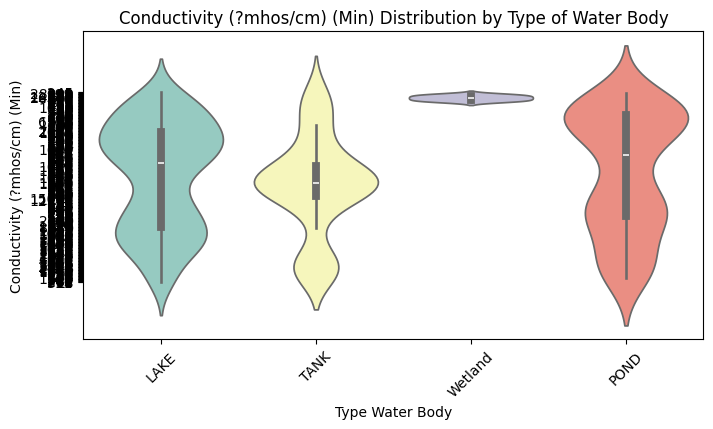

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


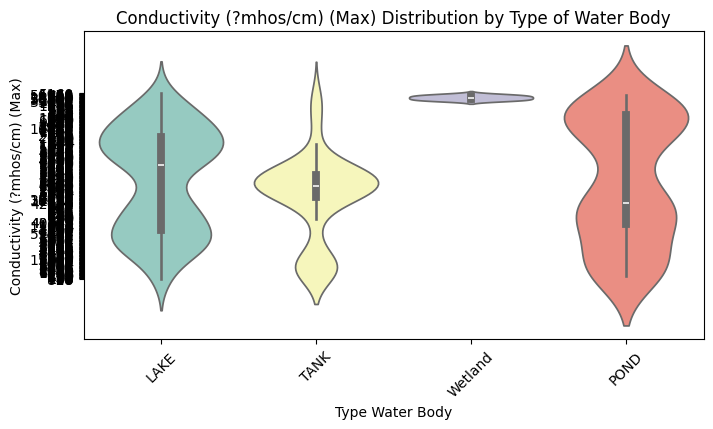

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


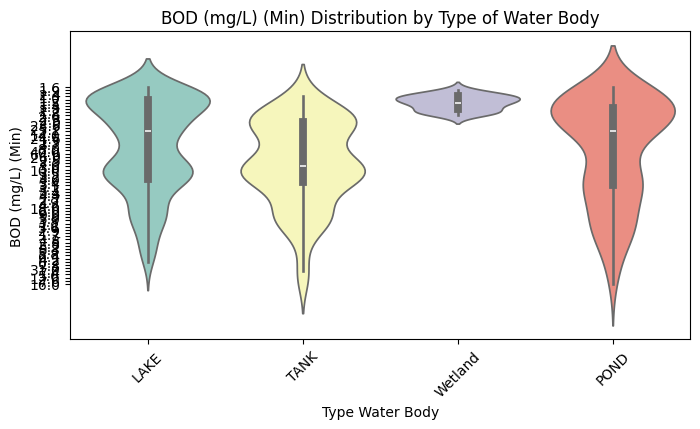

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


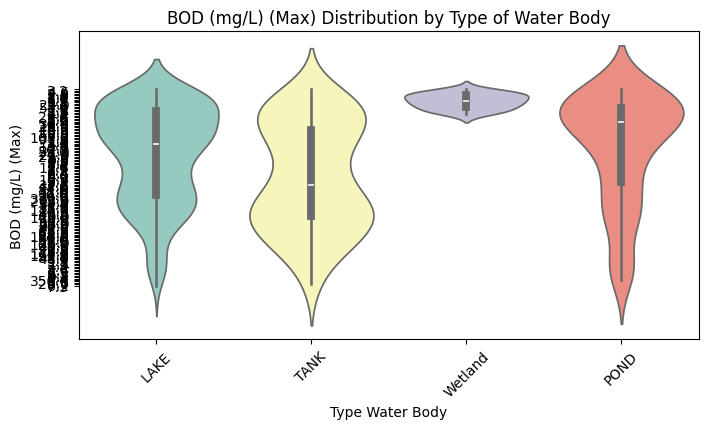

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


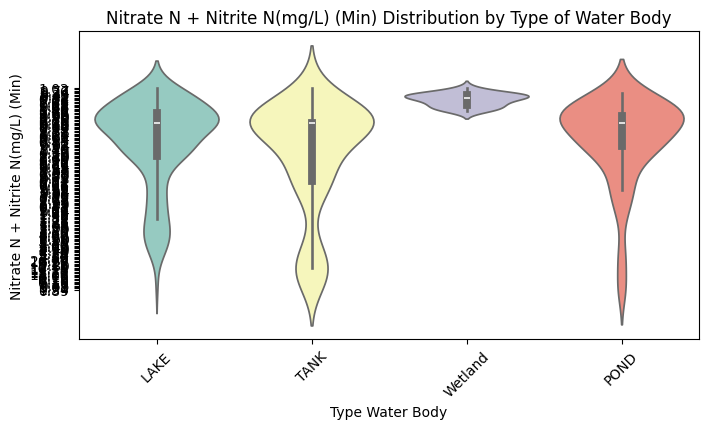

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


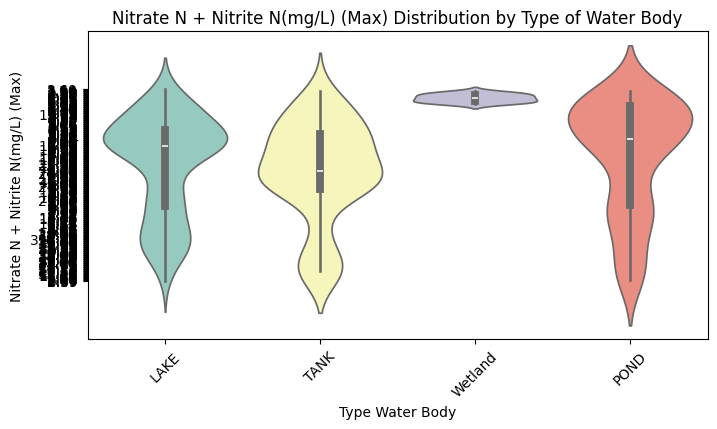

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


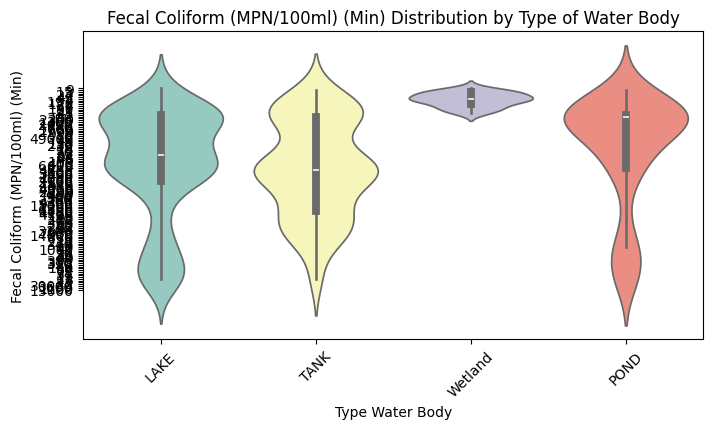

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


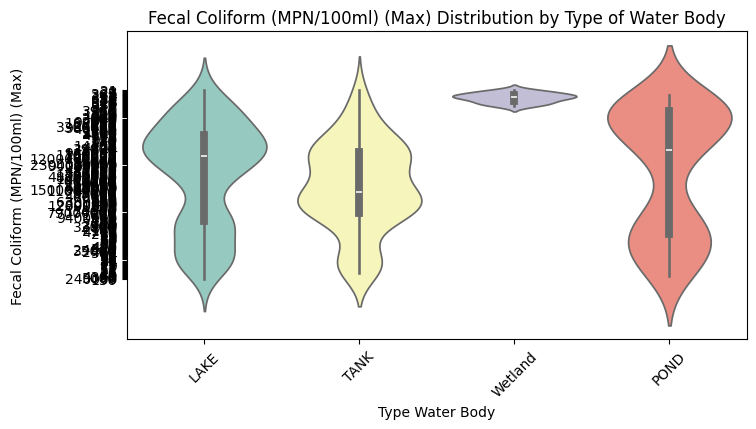

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


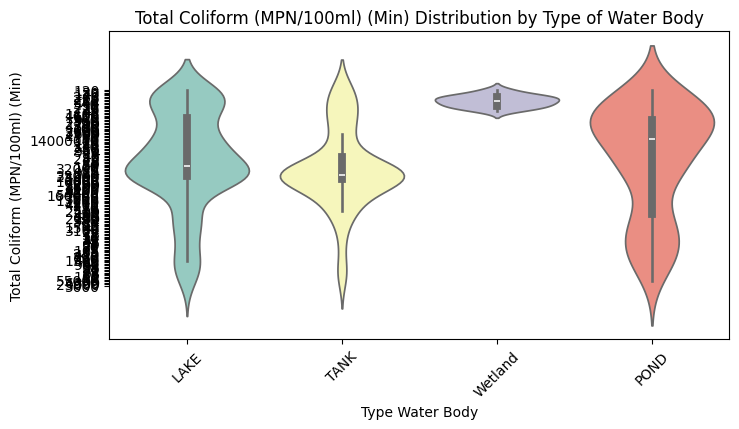

<ipython-input-11-3ccf26f1b1ce>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")


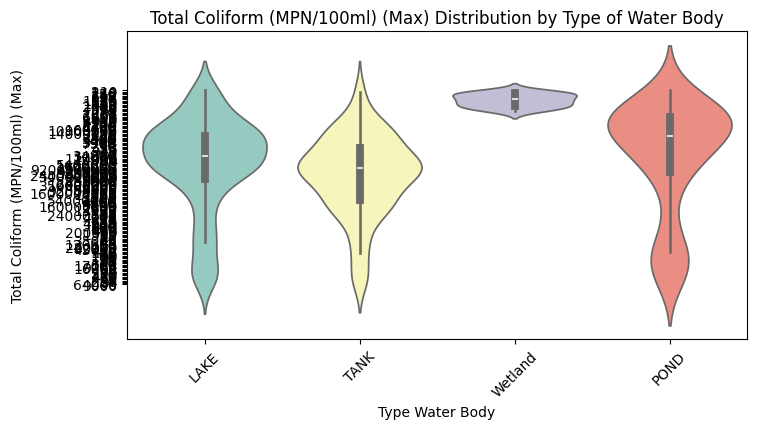

In [11]:
# Violin plots to compare water quality parameters across different water body types
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x="Type Water Body", y=col, data=data, palette="Set3")
    plt.title(f"{col} Distribution by Type of Water Body")
    plt.xticks(rotation=45)
    plt.show()
